# Breast Cancer Data Collection and Analysis 

## 1.Problem 

In the last few years people's lifestyle and environment have changed which changes our hormones. These changes affected our health and increased our probability of getting cancer[1]. Breast cancer is one of the most spread cancer types among women whey approximately 99% occurs in women[2]. Surely breast cancer can be cured in the first stages but getting late might make it impossible and lead to death. The ACS (American cancer society) suggests that older women should get mammograms every year[3] which means thousands of mammograms should be checked everyday. Analyzing and diagnosing all these mammograms require a lot of time for a doctor where it’s possible to save a life in this time. To reduce the time and provide a priority mechanism by applying some data mining task to the patient mammograms reading measurements.


## 2.Data Mining Task

In order to reduce the time taken in reading the mammograms for each patient we think that extracting the data and measurement of the cancer tumor of  patients that are already diagnosed will help us to classify them into different groups according to the stage hence facilitating the process of receiving treatment for the most prioritized patient. To accomplish this we identify our first task to apply classification using both entropy and Gini index. Since the classification process is supervised learning we are using data with a class attribute “diagnosis” which is labeled as M or B indicating the stage of cancer. In addition, we have tried another data mining task which is clustering where the modal creates a cluster for a group of patients with a similar characteristic without knowing the class label.


## 3.Data

*	The source of our dataset (breast-cancer) coming from:
             https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


*  Data types, numbers of objects and attributes and missing values

In [1]:
import piplite
await piplite.install('seaborn')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data=pd.read_csv('Original_dataset.csv')



In [2]:

# Display basic information about the dataset
print("Number of objects:", data.shape[0])
print("Number of attributes:", data.shape[1])
print("\nData types and missing values:")
print(data.info())

Number of objects: 569
Number of attributes: 32

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  

*	Attribute characteristics:

note: 
* The descriptionis only provided for unclear or hard to understand attributes.
* The mean, standard error and "worst" or largest (mean of the three
largest values) of the first 12 attributes were computed for each image,
resulting the rest of 30 attributes.

%%html
<table style="border:1;">
  <thead>
    <tr>
      <th>No</th>
      <th>Name</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>ID number</td>
      <td>Nominal and Integer</td>
      <td>ID number that distinguishes different samples/data that have been taken from different patients</td>
    </tr>
    <tr>
      <td>2</td>
      <td>Diagnosis</td>
      <td>Nominal and Character</td>
      <td>A class attribute that determinie the stage of the breast canser eaither M(malignant) or B(benign)</td>
    </tr>
    <tr>
      <td>3</td>
      <td>Radius_mean</td>
      <td>Numeric and Float</td>
      <td>Distances from center to points on the perimeter</td>
    </tr>
    <tr>
      <td>4</td>
      <td>Texture_mean</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>5</td>
      <td>Perimeter_mean</td>
      <td>Numeric and Float</td>
      <td>The distance around the nuclear border</td>
    </tr>
    <tr>
      <td>6</td>
      <td>Area_mean</td>
      <td>Numeric and Float</td>
      <td>Size of tumor</td>
    </tr>
    <tr>
      <td>7</td>
      <td>Smoothness_mean</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>8</td>
      <td>Compactness_mean</td>
      <td>Numeric and Float</td>
      <td>Measures the similarity between the shape of a breast tumor and its fitting circle</td>
    </tr>
    <tr>
      <td>9</td>
      <td>Concavity_mean</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>10</td>
      <td>Concave points_mean</td>
      <td>Numeric and Float</td>
      <td>The number of indentations present on the nuclear border</td>
    </tr>
    <tr>
      <td>11</td>
      <td>Symmetry_mean</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>12</td>
      <td>Fractal_dimension_mean</td>
      <td>Numeric and Float</td>
      <td>Used to locate the micro calcifications in the mammogram</td>
    </tr>
    <tr>
      <td>13</td>
      <td>Radius_se</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>14</td>
      <td>Texture_se</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>15</td>
      <td>Perimeter_se</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>16</td>
      <td>Area_se</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>17</td>
      <td>Smoothness_se</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>18</td>
      <td>Compactness_se</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>19</td>
      <td>Concavity_se</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>20</td>
      <td>Concave points_se</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>21</td>
      <td>Symmetry_se</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>22</td>
      <td>Fractal_dimension_se</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>23</td>
      <td>Radius_worst</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>24</td>
      <td>Texture_worst</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>25</td>
      <td>Perimeter_worst</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>26</td>
      <td>Area_worst</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>27</td>
      <td>Smoothness_worst</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>28</td>
      <td>Compactness_worst</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>29</td>
      <td>Concavity_worst</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>30</td>
      <td>Concave points_worst</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>31</td>
      <td>Symmetry_worst</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
    <tr>
      <td>32</td>
      <td>Fractal_dimension_worst</td>
      <td>Numeric and Float</td>
      <td></td>
    </tr>
  </tbody>
</table>


*  graphical presentation

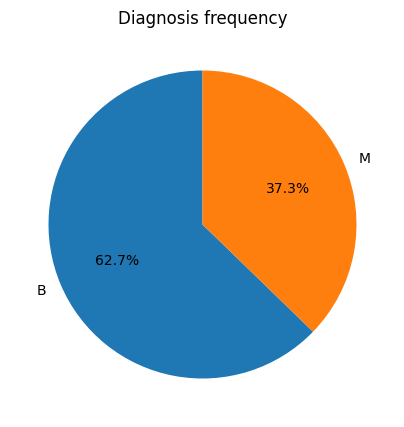

In [3]:


#calculate the frequancy for each diagnosis
diagnosis_frequency = data['diagnosis'].value_counts(normalize=True)*100

#plot a ppie chart
diagnosis_frequency.plot.pie(autopct='%1.1f%%',figsize=(5,5),startangle=90)

#display the plot with appropriate apperance by changing the values of the attribute
plt.title('Diagnosis frequency')
plt.ylabel('')
plt.show()

In the pie chart , it's observed that 37.3% of patients have a malignant diagnosis, while 62.7% have a benign diagnosis.

*	Five number summary

In [4]:
# Select numeric attributes
numeric_attributes = data.select_dtypes(include=np.number)

# Calculate the five-number summary
five_num_summary = numeric_attributes.describe().loc[['min', '25%', '50%', '75%', 'max']]

print("Five-number summary for numeric attributes:")
print(five_num_summary)

Five-number summary for numeric attributes:
              id  radius_mean  texture_mean  perimeter_mean  area_mean  \
min       8670.0        6.981          9.71           43.79      143.5   
25%     869218.0       11.700         16.17           75.17      420.3   
50%     906024.0       13.370         18.84           86.24      551.1   
75%    8813129.0       15.780         21.80          104.10      782.7   
max  911320502.0       28.110         39.28          188.50     2501.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
min          0.05263           0.01938         0.00000              0.00000   
25%          0.08637           0.06492         0.02956              0.02031   
50%          0.09587           0.09263         0.06154              0.03350   
75%          0.10530           0.13040         0.13070              0.07400   
max          0.16340           0.34540         0.42680              0.20120   

     symmetry_mean  ...  radius_wors

*	Outliers

In [5]:
# Detect outliers
Q1 = numeric_attributes.quantile(0.25)
Q3 = numeric_attributes.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_attributes < (Q1 - 1.5 * IQR)) | (numeric_attributes > (Q3 + 1.5 * IQR))).any()

print("\nOutliers:")
print(outliers)


Outliers:
id                          True
radius_mean                 True
texture_mean                True
perimeter_mean              True
area_mean                   True
smoothness_mean             True
compactness_mean            True
concavity_mean              True
concave points_mean         True
symmetry_mean               True
fractal_dimension_mean      True
radius_se                   True
texture_se                  True
perimeter_se                True
area_se                     True
smoothness_se               True
compactness_se              True
concavity_se                True
concave points_se           True
symmetry_se                 True
fractal_dimension_se        True
radius_worst                True
texture_worst               True
perimeter_worst             True
area_worst                  True
smoothness_worst            True
compactness_worst           True
concavity_worst             True
concave points_worst       False
symmetry_worst              True

the attributes with output True, indicating that these attributes have outliers, while the attributes with output False, indicating that these attributes  do not have outliers. so all the attributes have outliers except 'concave points_worst'

*	Boxplots

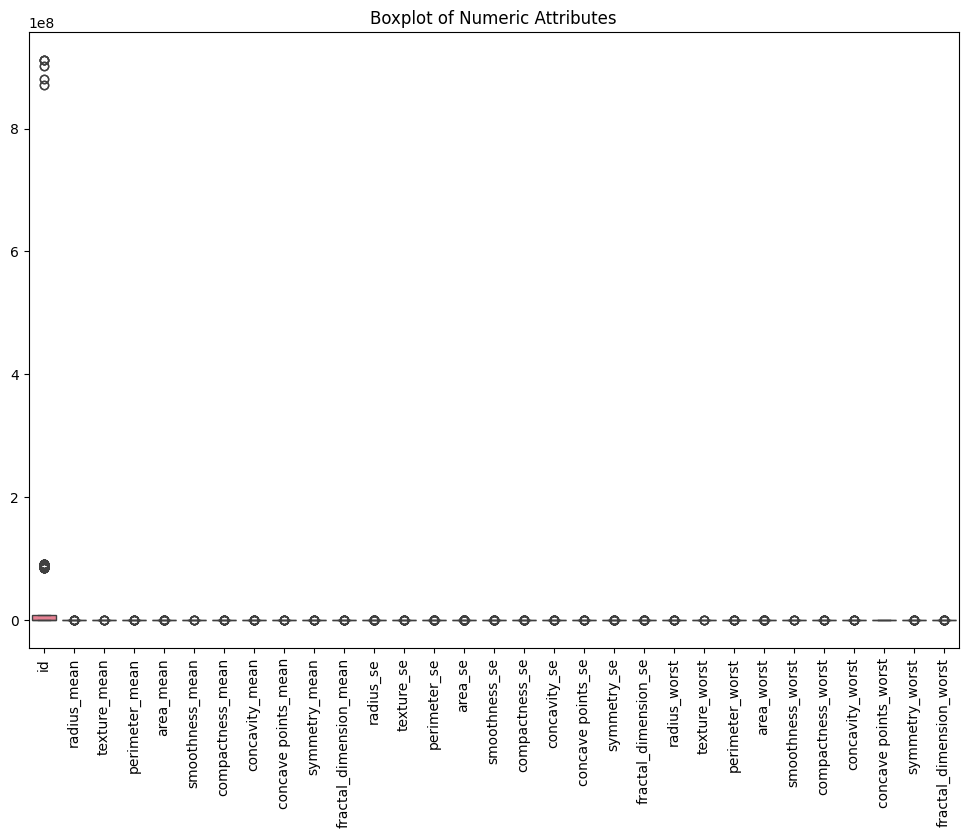

In [6]:
# Create boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_attributes)
plt.title("Boxplot of Numeric Attributes")
plt.xticks(rotation=90)
plt.show()

To visualize the five-number summary that has been computed along with the outliers. We can notice that all features have outliers expect concave points_worst. Identifying these outliers will help us at cleaning the data where we will remove them to have better results.

* Scatter plot

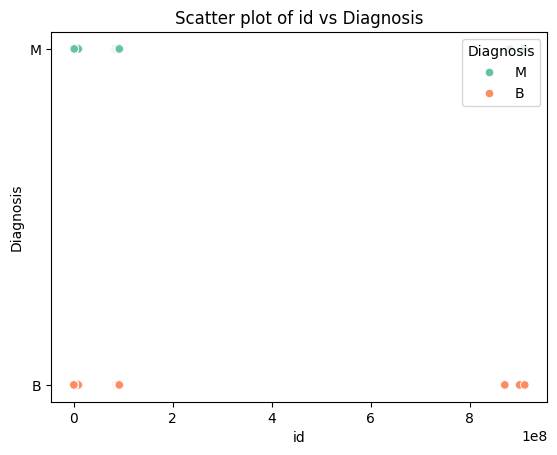

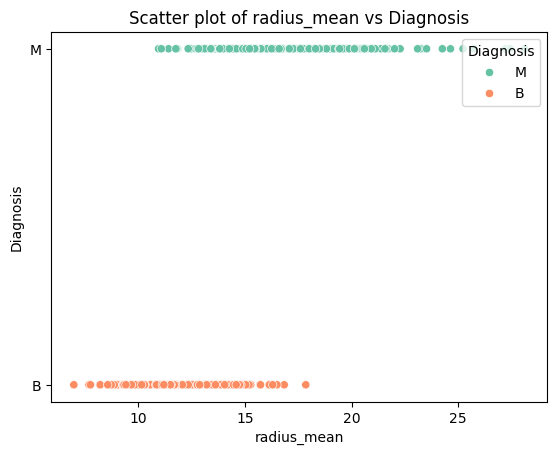

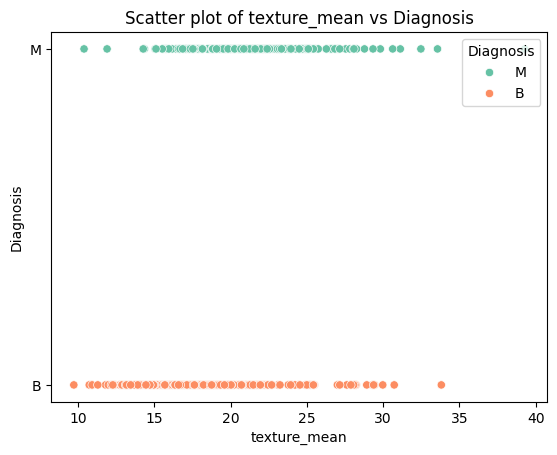

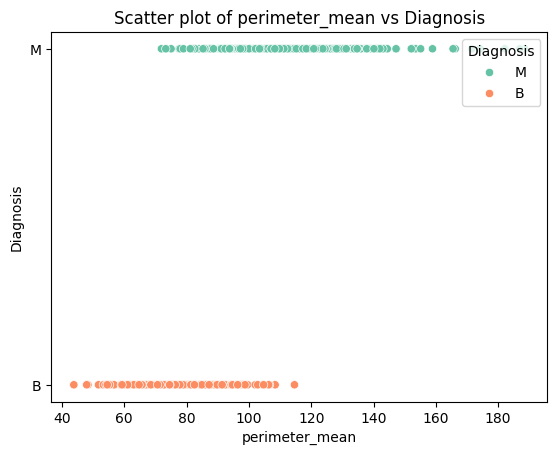

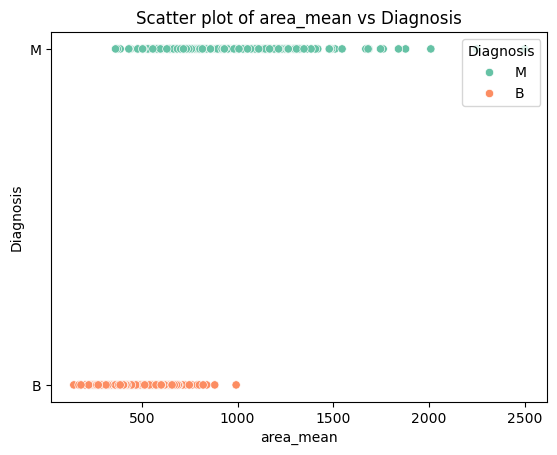

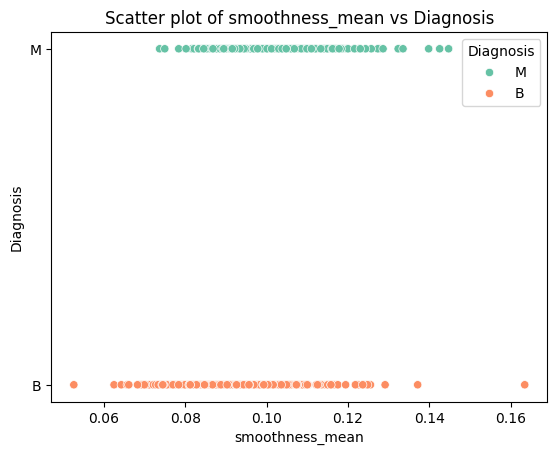

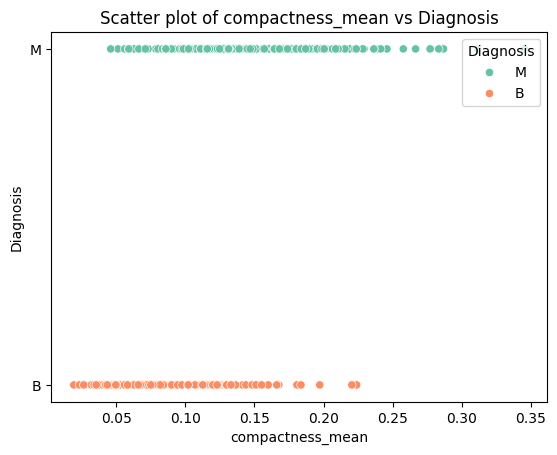

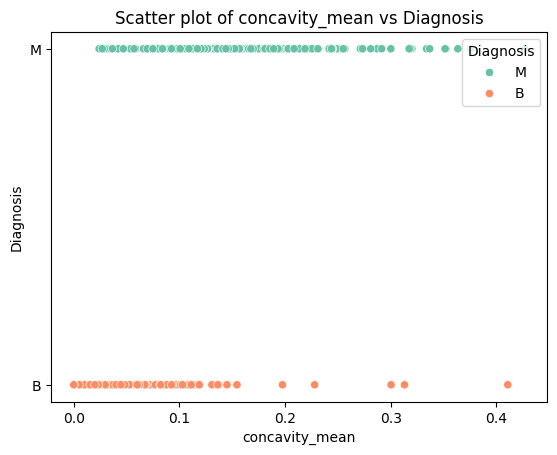

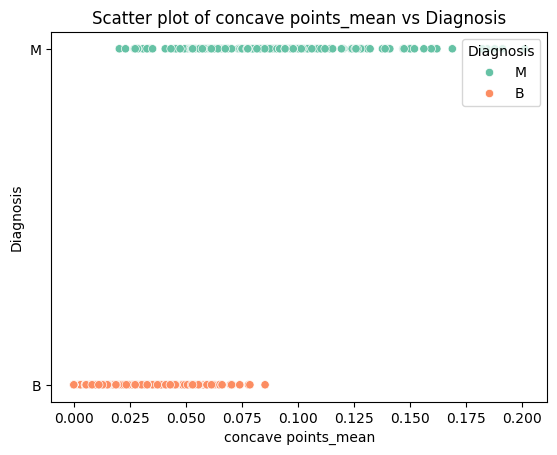

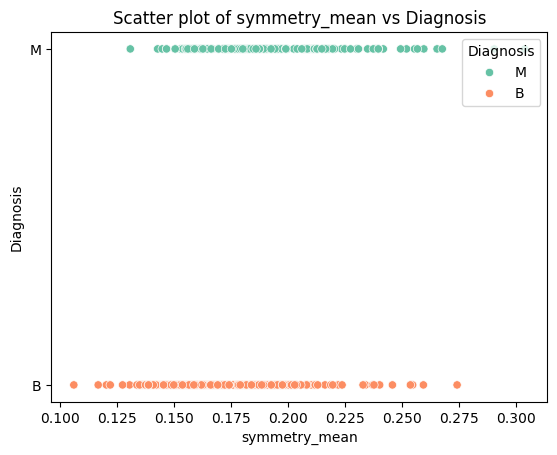

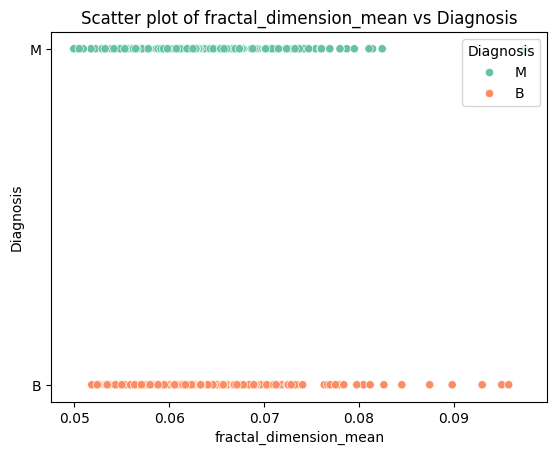

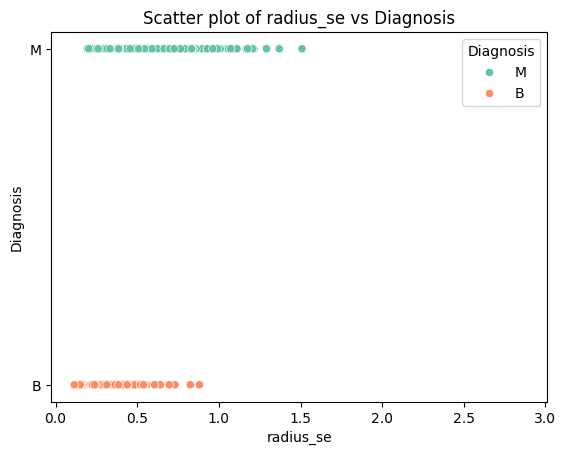

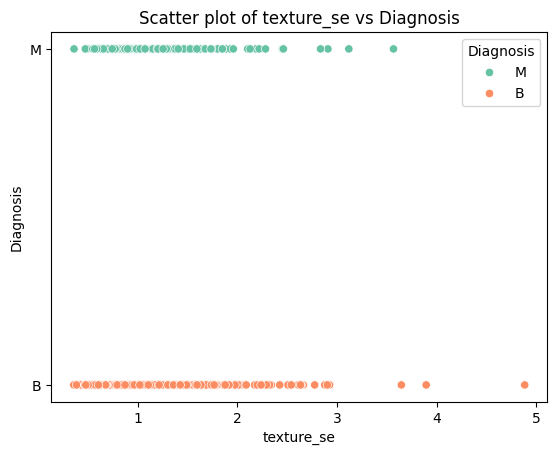

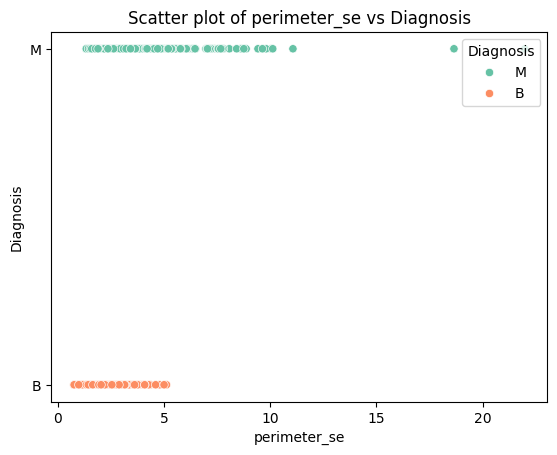

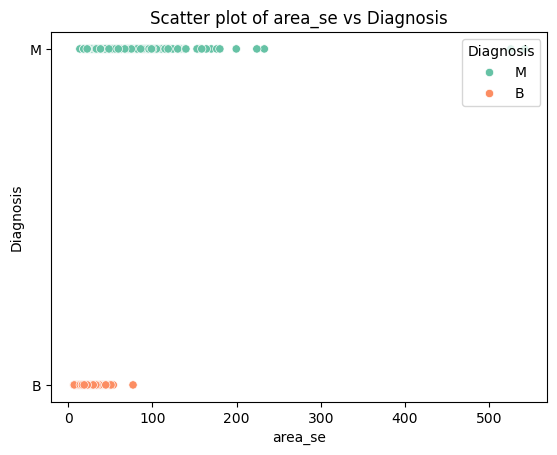

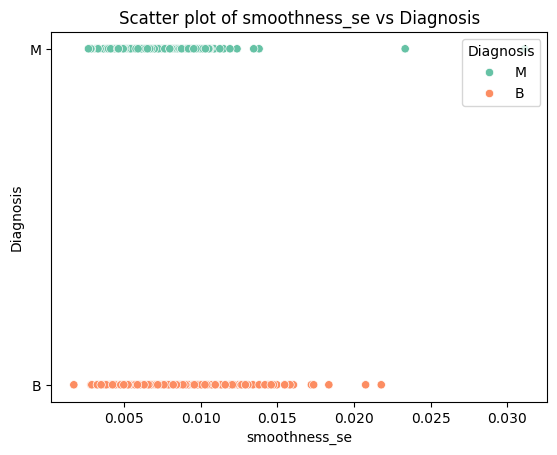

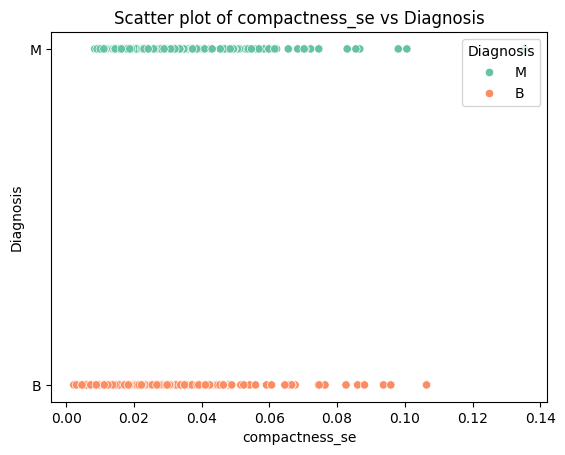

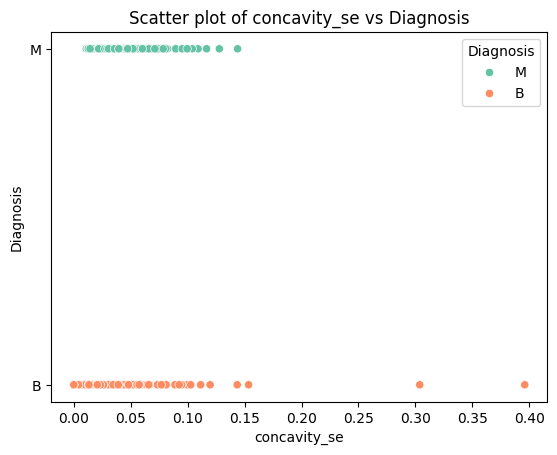

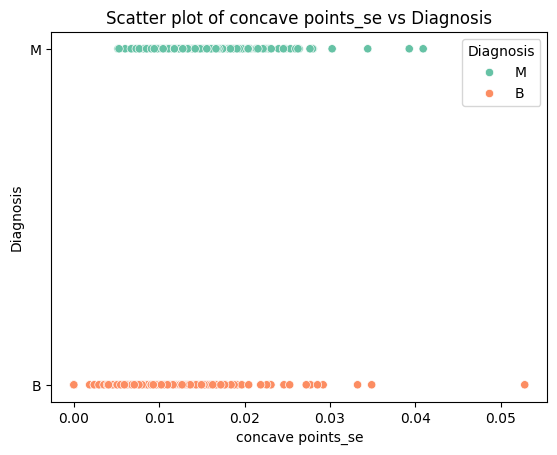

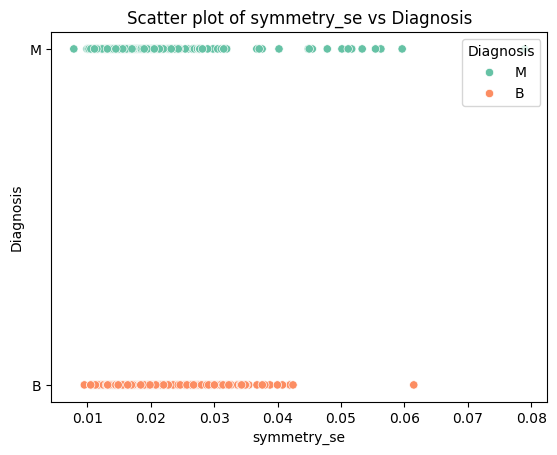

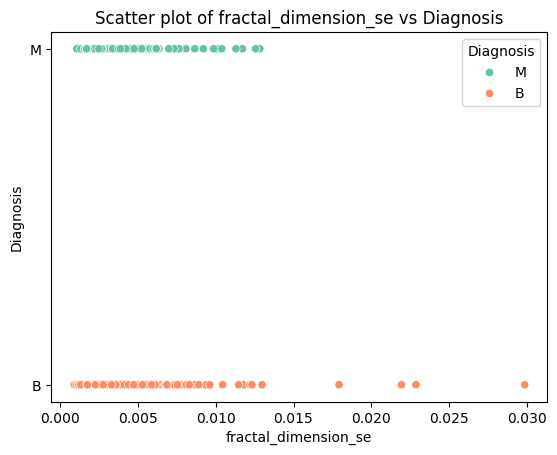

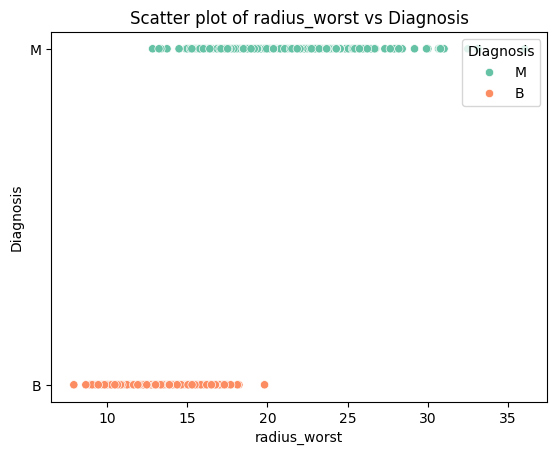

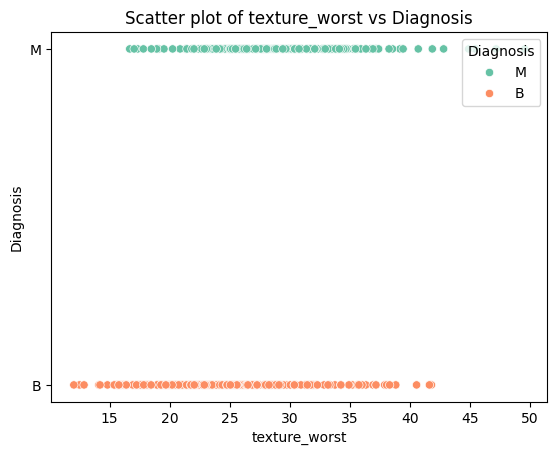

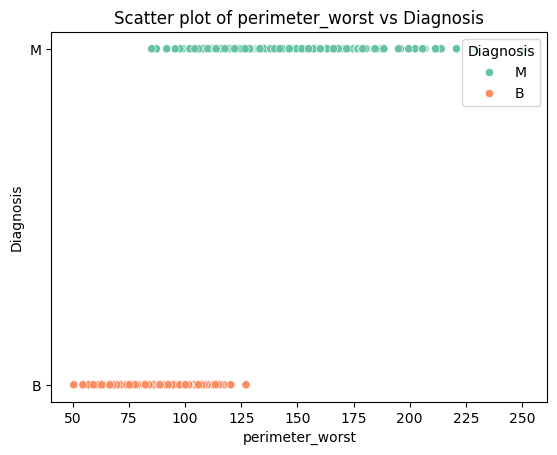

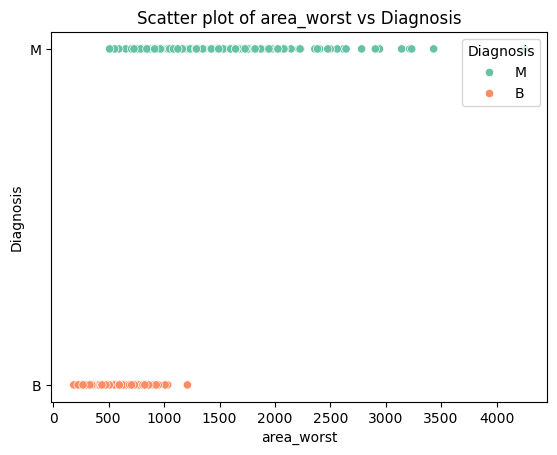

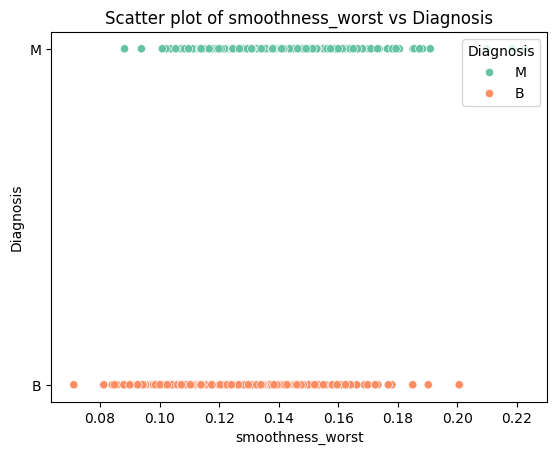

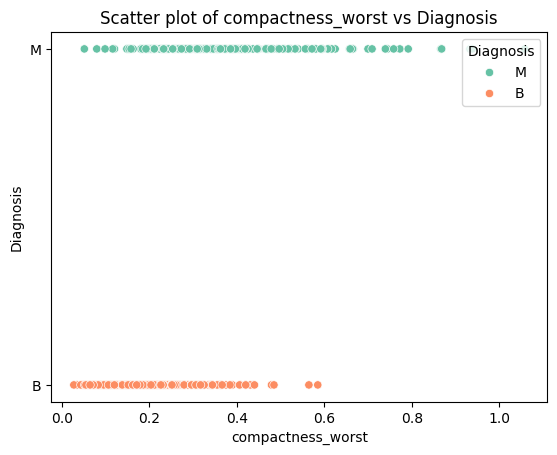

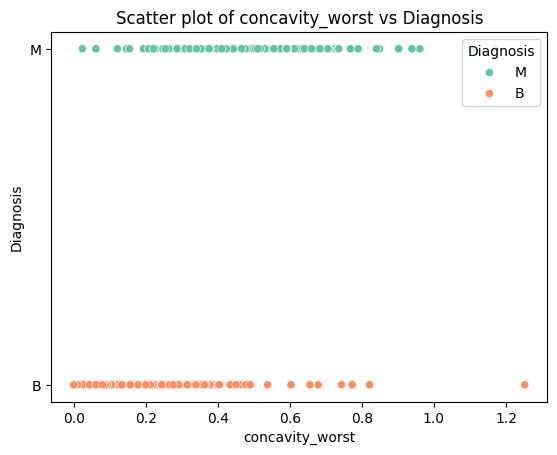

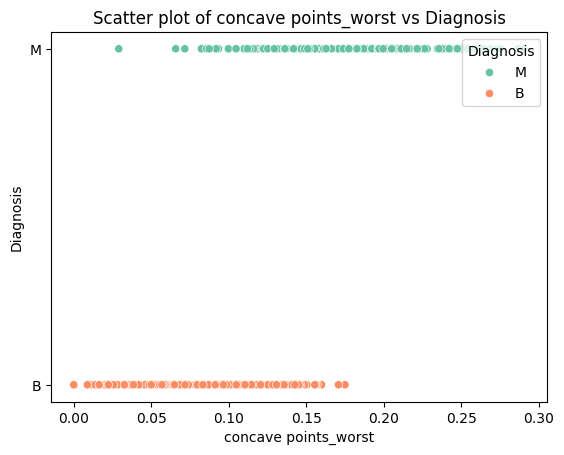

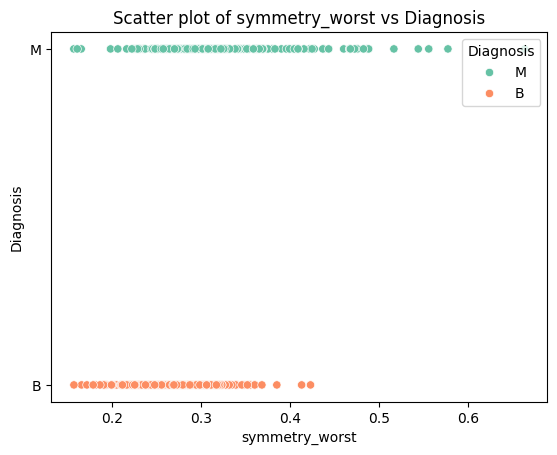

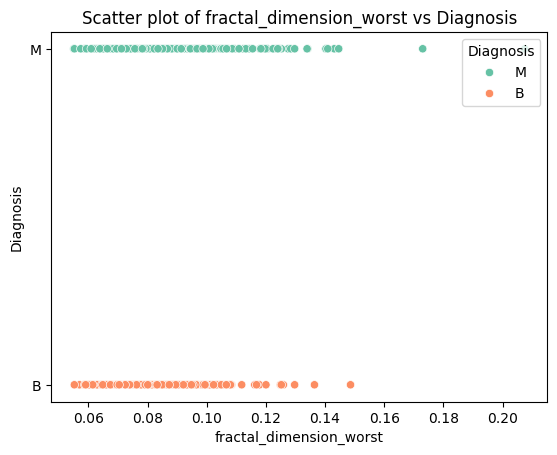

In [7]:
# Exclude the 'id' and 'diagnosis' columns
selected_features = data.drop(columns=['diagnosis'])

# Create scatter plots for each attribute against the target variable 'diagnosis'
for column in selected_features.columns:
    sns.scatterplot(data=data, x=column, y='diagnosis', hue='diagnosis', palette='Set2')
    plt.title(f"Scatter plot of {column} vs Diagnosis")
    plt.xlabel(column)
    plt.ylabel('Diagnosis')
    plt.legend(title='Diagnosis', loc='upper right')
    plt.show()

Majority of our data is a numeric data and one of the best ways to visualize it is using the matrix of scatter plots(pair plot) in order to have a clear vision of the relationship between the data. Here we display the relationship between the diagnosis and each feature. We can clearly see that M and B in most features can be easily distinguished by their different values, where we can see if it's high in the M it mostly lowe in B and vise-versa.

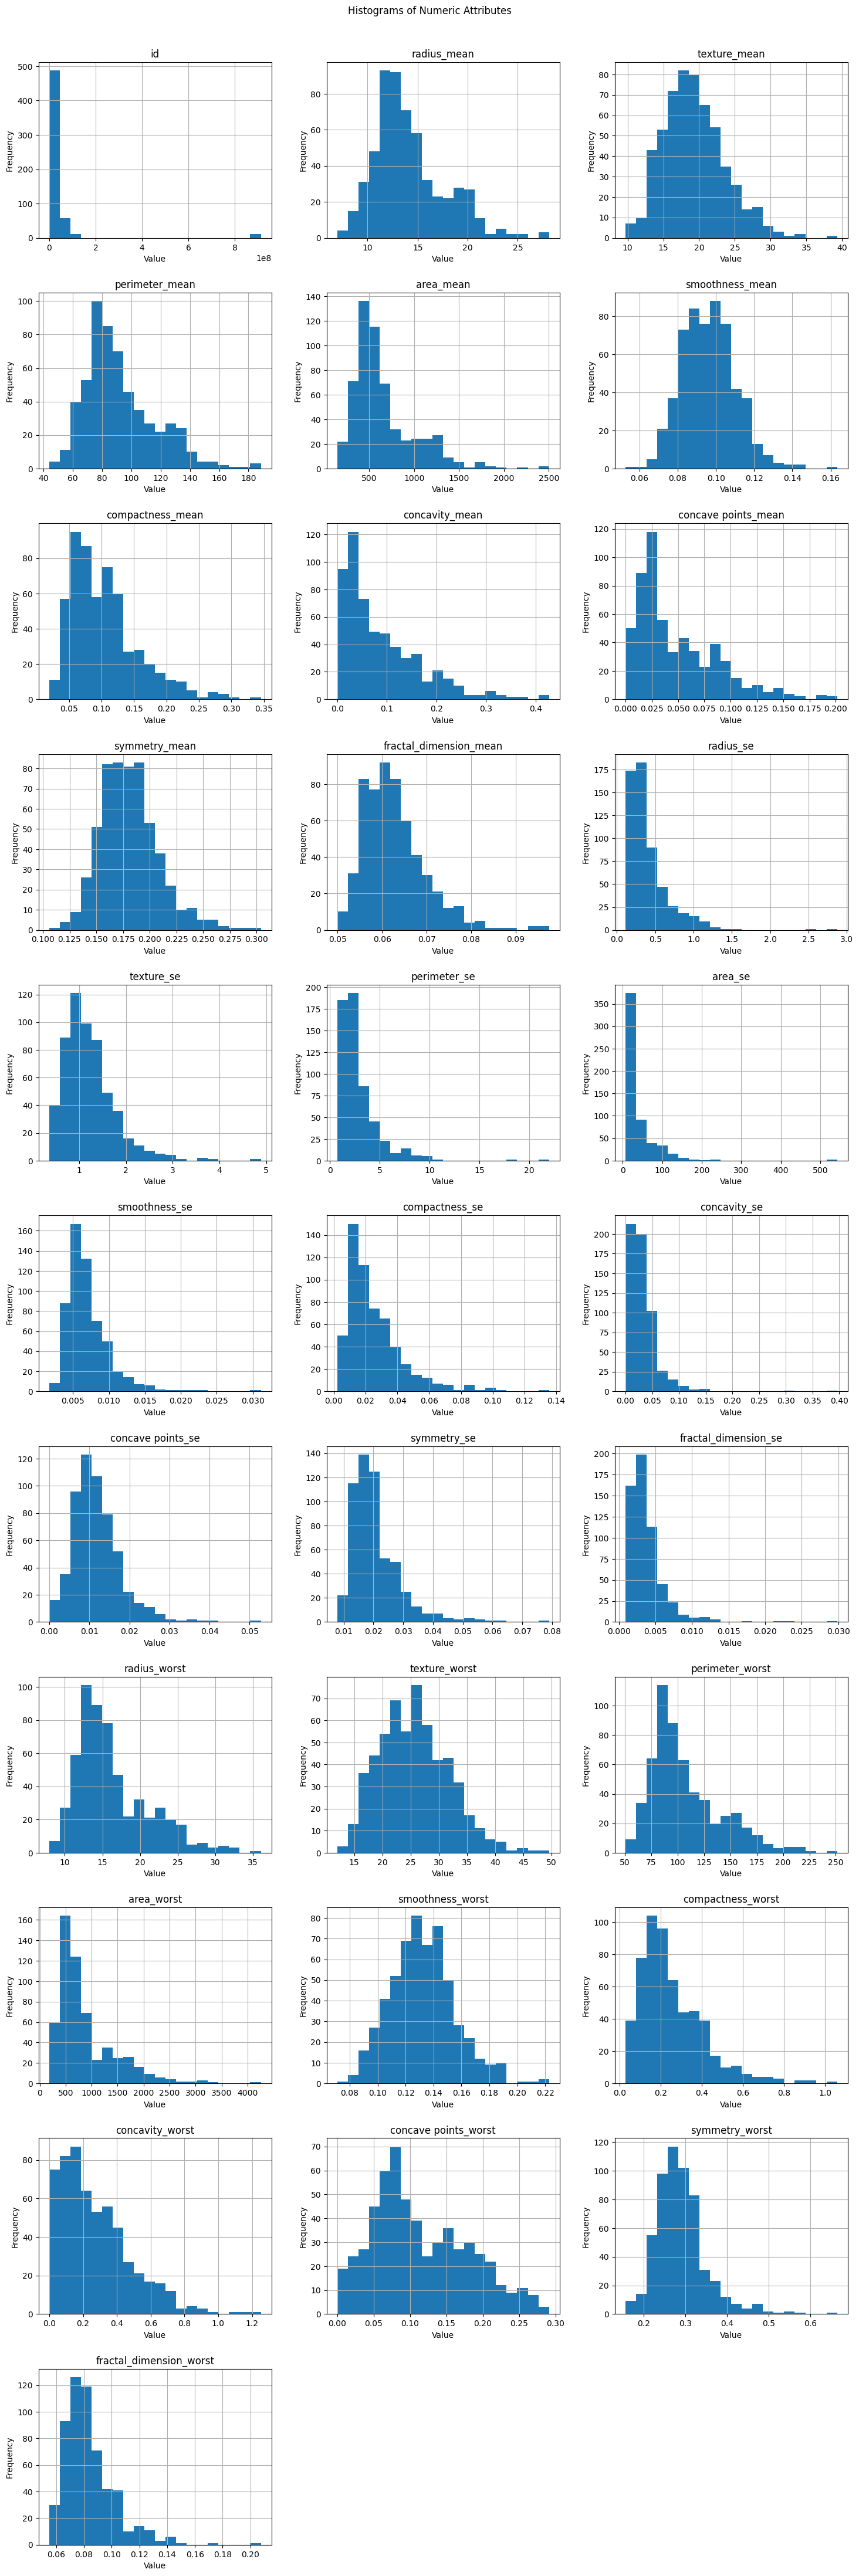

In [8]:
# Histogram for numeric attributes



# Get the numeric attributes (assuming 'diagnosis' is categorical)
numeric_data = data.drop('diagnosis', axis=1)

# Determine the number of rows and columns for subplots
num_cols = 3  # Number of columns for the subplots
num_rows = (len(numeric_data.columns) - 1) // num_cols + 1  # Number of rows needed

# Calculate the figure size based on the number of subplots
fig_width = 5 * num_cols
fig_height = 4 * num_rows

# Create subplots with specified figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Plot histograms for each numeric attribute
for i, column in enumerate(numeric_data.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    numeric_data[column].hist(ax=ax, bins=20)
    ax.set_title(column)  # Set title for the subplot
    ax.set_xlabel('Value')  # Set label for x-axis
    ax.set_ylabel('Frequency')  # Set label for y-axis
    ax.grid(True)  # Add grid
    
# Remove any unused subplots
for j in range(len(numeric_data.columns), num_rows * num_cols):
    if num_rows > 1:
        fig.delaxes(axes.flatten()[j])
    else:
        fig.delaxes(axes[j])

# Add overall title above all subplots
fig.suptitle("Histograms of Numeric Attributes", y=1.0)

# Adjust layout to add space between subplots
plt.tight_layout(pad=2.0)

# Display the plot
plt.show()



Here we see that the values of each attribute are distributed individually. For example, radius-mean its value is concentrated between 10 and 15.

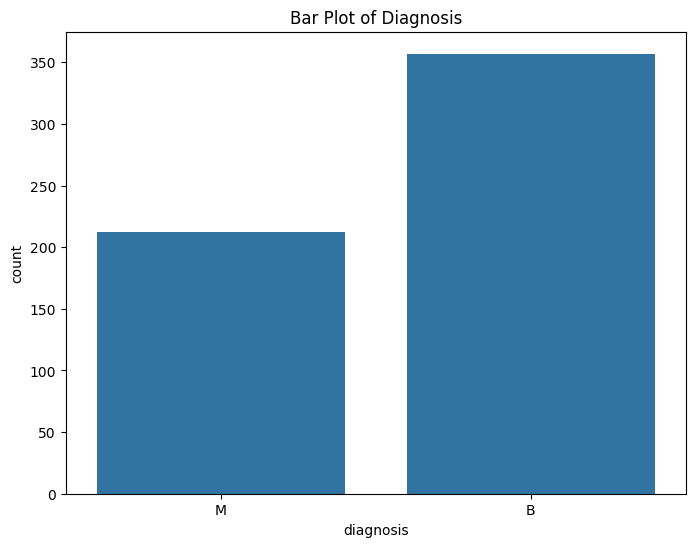

In [9]:
# Bar plot for nominal attribute
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data)
plt.title("Bar Plot of Diagnosis")
plt.show()

The bar plot illustrates that the number of individuals diagnosed with benign tumors exceeds those diagnosed with malignant tumors. Specifically, the count of individuals diagnosed with benign tumors is approximately 350, whereas the count of individuals diagnosed with malignant tumors is approximately 220.

## 4.Data preprocessing

شرح لوش استخدمنا وليش 

*	Checking for missing value:

to inspect the presence of missing values in a DataFrame and understand which columns contain missing data and how many missing values are present in each column

In [19]:
# checking missing value
missing_values= data.isna().sum() #calculates the number of missing values for each column in the DataFrame 
print(missing_values)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


*	Check for duplicated rows

to ensures that the  data is clean, accurate, and ready for analysis

checking for and handle duplicated rows in a DataFrame. If duplicate rows are found, they can be removed to ensure data integrity and accuracy in subsequent analysis. If no duplicates are found, the code provides feedback confirming this.

In [20]:
# Check for duplicated rows
duplicate_rows = data[data.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows values found! Removing duplicates...")
    
else:
    print("No duplicate rows values found.")

No duplicate rows values found.


*	Removing outliers

By cleaning the dataset from outliers, we aim to improve data quality, accuracy, and the robustness of any insights or predictions derived from it.

identify and remove outliers from numeric columns in a DataFrame, contributing to data preprocessing and cleaning tasks.

In [21]:
# outliers removing

# Iterate through each column
for col in data.columns:
    if col != 'diagnosis':  # Exclude 'diagnosis' column
        if np.issubdtype(data[col].dtype, np.number):  # Check if column is numeric
            # Define function to remove outliers based on mean for each column
            def remove_outliers_based_on_mean(column):
                mean = np.nanmean(column)  # Use np.nanmean() to handle NaN values
                std_dev = np.nanstd(column)
                lower_bound = mean - (2.5 * std_dev)
                upper_bound = mean + (2.5 * std_dev)
                filtered_column = column[(column >= lower_bound) & (column <= upper_bound)]
                return filtered_column

            # Apply the function to remove outliers from the column
            data[col] = remove_outliers_based_on_mean(data[col])

# Drop rows with any NaN values after removing outliers
data.dropna(inplace=True)

num_rows = data.shape[0]
print("Number of rows in the DataFrame after removing outliers:", num_rows)   

Number of rows in the DataFrame after removing outliers: 451


*	Encoding of classified column

We encode the classified column to convert categorical data into a numerical format that can be easily used for analysis or machine learning algorithms and to be ensure that the classification task can be performed accurately and efficiently on the dataset.

In [22]:
# Apply Label Encoding to the diagnosis column
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])             

*	Balancing data

balancing data for building robust and unbiased machine learning models that perform well across all classes and accurately reflect the underlying distribution of data in real-world scenarios.

We need to check the data balance of the label class(diagnosis) and to do so we can count print the percentage of each class(M and B)

In [23]:
import matplotlib.pyplot as plt

#calculate the frequancy for each diagnosis
diagnosis_frequency = data['diagnosis'].value_counts(normalize=True)*100

print("The percentage of each diagnosis:\n" + diagnosis_frequency.to_string())

The percentage of each diagnosis:
0    69.40133
1    30.59867


from the privious code we can see clearly that the data balance not have a closely equl persentage so we aim to a 60% M and 40% B as it's the closest to equality and maintane as much as possible from the data.
To done this we identified which class is takiing the larger percentage(df_majority) and which is less(df_minority) then using proportional sampling to calculate number of the class M class which down sampled to rech the disaierd distribution. Lastly join the data and update our dataset.

In [24]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = data[data['diagnosis'] == 0]
df_minority = data[data['diagnosis'] == 1]

print("Number of samples in majority class:", len(df_majority))
print("Number of samples in minority class:", len(df_minority))

# Determine the number of instances to keep for the majority class
num_minority_samples = len(df_minority)
num_majority_samples_to_keep = int(num_minority_samples / 0.6 * 0.4)  # Keep 40% of the minority class

# Randomly undersample the majority class
df_majority_downsampled = df_majority.sample(n=num_majority_samples_to_keep, random_state=42)

print("Number of samples in undersampled majority class:", len(df_majority_downsampled))

# Combine majority class with minority class along rows (axis 0)
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Reset index to avoid duplicate indices in concatenated DataFrame
df_balanced.reset_index(drop=True, inplace=True)

print("Number of samples in balanced dataset:", len(df_balanced))
df = df_balanced
# Now df_balanced contains a 60%-40% representation of both classes with undersampling

#calculate the frequancy for each diagnosis
diagnosis_frequency = df['diagnosis'].value_counts(normalize=True)*100

#to ensure that out work was correct we reprint the percentage
print("The percentage of each diagnosis after balaansing:\n" + diagnosis_frequency.to_string())

Number of samples in majority class: 313
Number of samples in minority class: 138
Number of samples in undersampled majority class: 92
Number of samples in balanced dataset: 230
The percentage of each diagnosis after balaansing:
1    60.0
0    40.0


*	Discretization

Discretization the numeric columns in the DataFrame df_balanced into a specified number of bins, except for the 'diagnosis' and 'id' columns, which are excluded from the process. Discretization can be useful for certain machine learning algorithms that require categorical features or for analyzing data in a more interpretable format.

Discretization simplifies the process of representing data, making it easier to analyze, interpret, and make decisions, and can be useful in some machine learning algorithms.

In [25]:
# Discretization

# Define number of bins
num_bins = 3

# Iterate through each column
for col in df_balanced.columns:
    # Exclude 'diagnosis' and 'id' columns
    if col not in ['diagnosis', 'id']:
        # Perform discretization using the cut function
        df_balanced[col] = pd.cut(df_balanced[col], bins=num_bins, labels=False, duplicates='drop')
        #The result of pd.cut() is a new Series where each value from the original column df_balanced[col] is
       # replaced with an integer representing the bin number to which it belongs. 
        #This discretized Series is then assigned back to the original DataFrame column df_balanced[col].


*	Feature selection

We try to choose the best 10 feature beside the id and the diagnosis feature because according to most resourses it's enough to have 10 attributes to determine the breast cancer diagnosis

In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'diagnosis' column
label_encoder = LabelEncoder()
df_balanced['diagnosis_encoded'] = label_encoder.fit_transform(df_balanced['diagnosis'])

# Select features and target variable
X = df_balanced.drop(columns=['id', 'diagnosis', 'diagnosis_encoded'])  # Features
y = df_balanced['diagnosis_encoded']  # Encoded target variable

# Calculate the correlation coefficients between features and target variable
correlation_values = np.abs(X.corrwith(y))

# Sort the correlation values in descending order
correlation_values.sort_values(ascending=False, inplace=True)

# Select the top k features based on correlation
k = 10  # Choose the desired number of features
selected_feature_names = correlation_values.head(k).index.tolist()
df_selected = df_balanced[['diagnosis', 'id'] + selected_feature_names]
print("Selected Features based on Correlation:")
print(selected_feature_names)


Selected Features based on Correlation:
['perimeter_worst', 'radius_worst', 'concave points_mean', 'perimeter_mean', 'concave points_worst', 'radius_mean', 'concavity_mean', 'area_mean', 'concavity_worst', 'area_worst']


*	Normalization

Normalization is important because it makes our data easier for modeling and evaluation. By scaling all our features to a specific range, like between 0 and 1, normalization ensures that our numbers are in a consistent format. This consistency helps our models understand and learn from the data more effectively. It also makes it simpler to compare the importance of different features in our model. Overall, normalization makes our data more manageable and helps our models perform better.

In [27]:
#normalized data
from sklearn.preprocessing import StandardScaler
coulmns_to_normalize=selected_feature_names
data_to_normalize=df_selected[coulmns_to_normalize]

In [28]:
zscore_scaler=StandardScaler()
normalized_data_zscore=zscore_scaler.fit_transform(data_to_normalize)

In [29]:
df_selected[coulmns_to_normalize]=normalized_data_zscore

<ipython-input-29-02c0985be1f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[coulmns_to_normalize]=normalized_data_zscore


In [30]:
print("Z-score normalized data:")
print(df_selected)


Z-score normalized data:
     diagnosis          id  perimeter_worst  radius_worst  \
0            0     86561.0        -1.104265     -1.130910   
1            0    857374.0        -1.104265     -1.130910   
2            0    905189.0         0.191556      0.163166   
3            0     89296.0        -1.104265     -1.130910   
4            0    869931.0        -1.104265     -1.130910   
..         ...         ...              ...           ...   
225          1  91930402.0         1.487377      1.457242   
226          1    919555.0         1.487377      1.457242   
227          1  91979701.0         0.191556     -1.130910   
228          1    926682.0         1.487377      1.457242   
229          1    926954.0         0.191556      0.163166   

     concave points_mean  perimeter_mean  concave points_worst  radius_mean  \
0              -1.044982        0.022963             -1.399613     0.017028   
1              -1.044982       -1.297394             -1.399613    -1.288422   
2    

In [119]:
#save the modified dataframe to new csv file 
df_selected.to_csv('Processed_dataset.csv',index=False)

* raw dataset // after encoding and cleaning from outliers!!!!!!!!!!!!!!!!

In [31]:
data= pd.read_csv('Original_dataset.csv')
print(data.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

* processed dataset

In [32]:
data= pd.read_csv('Processed_dataset.csv')
print(data.head())

   diagnosis      id  concave points_worst  perimeter_worst  perimeter_mean  \
0          0  903811             -1.269231          -0.8446       -0.966879   
1          0  864033             -1.269231          -0.8446       -0.966879   
2          0   91227             -1.269231          -0.8446       -0.966879   
3          0  914101             -1.269231          -0.8446       -0.966879   
4          0  868223             -1.269231          -0.8446       -0.966879   

   radius_worst  radius_mean  concave points_mean  concavity_mean  area_mean  \
0      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
1      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
2      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
3      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
4      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   

   compactness_mean  concavity_worst  
0    

## 5.Data Mining Technique

We applied both classification(supervised learning) and clustering(unsupervised learning) techniques .

For classification, we used a decision tree which is a recursive algorithm produces a tree with a leaf nodes representing the final decisions. Our model will predict the class label (diagnosis) which has two classes: Malignant(M) and benign(B), the prediction is made on the rest attributes. This technique includes dividing the dataset into Training dataset which  Used for building the decision tree, and Testing dataset which Used to evaluate the constructed model.

For clustering, we did not use a class label(diagnosis) for implementing the cluster because it is unsupervised learning thus we deleted the class label and used all other attributes in clustring after the preprocessing data (concave points_worst, perimeter_worst, perimeter_mean, radius_worst, radius_mean,concave points_mean, concavity_mean, area_mean, compactness_mean, and concavity_worst) all of them of type numeric so no need to convert them before the clustering process. 

To implement the clusters we used the K-mean algorithm, which is an algorithm that produces K clusters, which each cluster is represented by the center point of the cluster and assigns each object to the nearest cluster, then iteratively recalculates the center, and reassigns the object until the center point of each cluster does not change that means the object in the right cluster.

Python packages and methods for classification :
*  pandas to read the data
*  DataFrame()
* sklearn.tree to import DecisionTreeClassifier()
* sklearn.model_selection to import train_test_split()
* sklearn to import metrics and tree
* keys().tolist()
* train_test_split()
* DecisionTreeClassifier()
* Tclf.fit()
* Tclf.predict()
* metrics.accuracy_score()
*  sklearn.metrics to  import confusion_matrix() and   ConfusionMatrixDisplay()
* matplotlib.pyplot
* unique()
* ConfusionMatrixDisplay.from_estimator()
* subplots()
* tree.plot_tree

Python packages and methods for clustering :
*  pandas
*  drop()
*  sklearn.preprocessing to import scale
* sklearn.preprocessing to import StandardScaler()
* scaler.fit_transform()
* DataFrame()
* numpy
* sklearn.cluster to import KMeans
* random.seed()
*  KMeans() and  kmeans.fit()
*  yellowbrick
*  yellowbrick.cluster to import SilhouetteVisualizer()
*  visualizer.fit() and  visualizer.show()
*   matplotlib.pyplot
*  wcss.append()
*  plt.plot() and plt.title()
* plt.xlabel()
* plt.ylabel()
* plt.show()

## 6.Evaluation and Comparison

### Classification

## Classification

Classification is a fundamental task in machine learning and data analysis, with applications across various domains. Its importance lies in its ability to categorize or classify data into predefined classes or categories based on input features.

Firstly we are going to read the data  and and import the necessary libraries.

In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [34]:
# Load the data set from  students.csv
df_clas=pd.read_csv("Processed_dataset.csv")
print(df_clas.head())

   diagnosis      id  concave points_worst  perimeter_worst  perimeter_mean  \
0          0  903811             -1.269231          -0.8446       -0.966879   
1          0  864033             -1.269231          -0.8446       -0.966879   
2          0   91227             -1.269231          -0.8446       -0.966879   
3          0  914101             -1.269231          -0.8446       -0.966879   
4          0  868223             -1.269231          -0.8446       -0.966879   

   radius_worst  radius_mean  concave points_mean  concavity_mean  area_mean  \
0      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
1      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
2      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
3      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
4      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   

   compactness_mean  concavity_worst  
0    

the ID column should be excluded as it does not contribute to the predictive accuracy of the model, so we will drop it

In [35]:
df_clas.drop(columns=['id'], inplace=True)

preparing the data for training a machine learning model by separating the features (x) from the target variable (y). This is a preprocessing step before training a classification model 

In [39]:
fn=df_clas.keys().tolist() [1:] #geting a a list of column names from data set exclude the first element (lable)and convert a list to a Python list
x=df_clas[fn] #creates a new DataFrame x containing  the list of feature names fn obtained in the previous line.
y=df_clas['diagnosis'] #creates a Series y containing the target variable (diagnosis)
print(x)

     concave points_worst  perimeter_worst  perimeter_mean  radius_worst  \
0               -1.269231        -0.844600       -0.966879     -0.845160   
1               -1.269231        -0.844600       -0.966879     -0.845160   
2               -1.269231        -0.844600       -0.966879     -0.845160   
3               -1.269231        -0.844600       -0.966879     -0.845160   
4               -1.269231        -0.844600       -0.966879     -0.845160   
..                    ...              ...             ...           ...   
348              1.446154         0.868871        2.379281      0.840385   
349              1.446154         0.868871        2.379281      0.840385   
350              0.088462         0.868871        0.706201      0.840385   
351              0.088462         0.868871        0.706201      0.840385   
352              1.446154         0.868871        0.706201      0.840385   

     radius_mean  concave points_mean  concavity_mean  area_mean  \
0      -0.985477   

splitting the dataset into training and testing sets and specifies the proportion of the dataset to include in the test split. Here, 30% of the data will be reserved for testing, and the remaining 70% will be used for training,additionally Setting a random seed ensures that the split is deterministic and the same split is obtained each time the code is run.
* x_train: This contains the features of the training set.* 
x_test: This contains the features of the testing set
*  .* 
y_train: This contains the target values of the training se
* t* .
y_test: This contains the target values of the testing s
  
These subsets are used for training and evaluating machine learning models. et.

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

initialization a decision tree classifier, train it using the training data, and then use it to predict labels for the test data.





In [41]:
Tclf= DecisionTreeClassifier() #Gini is the selection measure by The default for initialization a decision tree classifie
Tclf=Tclf.fit(x_train,y_train) # The fit method takes the features (x_train) and corresponding target labels (y_train) as input and fits the model to the training data.
y_pred=Tclf.predict(x_test) #The predict method takes the features of the test set as input and returns the predicted labels (y_pred) based on the learned patterns.

Calculate the accuracy of the classifier's predictions on the test data and print it. The accuracy score is calculated by comparing the predicted labels (y_pred) to the actual labels (y_test).

In [42]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred)) 

Accuracy: 0.9056603773584906


Provide a visual representation of how well the classifier performs in terms of correct and incorrect prediction for each class.

[[41  3]
 [ 7 55]]


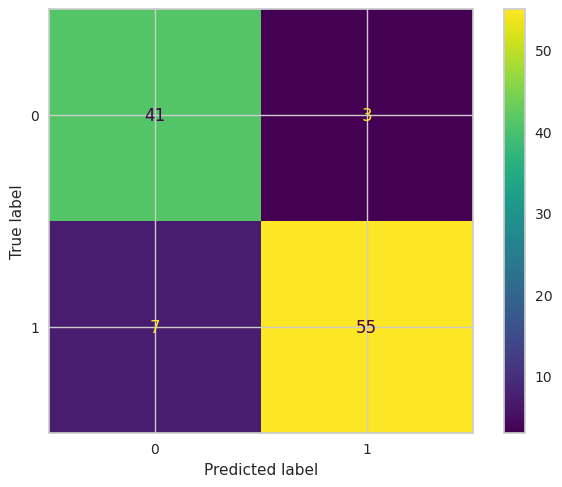

In [43]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred) # Computes the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred)
print(cm)  #print The confusion matrix which is a table that describes the performance of a classification model.

cn=df_clas['diagnosis'].unique() # Retrieves the unique classes (diagnosis values) to be used as display labels in the confusion matrix visualization.

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn) #display the confusion matrix visualization

We will use different test sizes to find out which test size provides the best balance between training and testing, resulting in the highest accuracy. The sizes we will use are 0.2 and 0.1

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1) # changing test_size to be 0.2

In [45]:
Tclf= DecisionTreeClassifier() #Gini is the selection measure by The default
Tclf=Tclf.fit(x_train,y_train)
y_pred=Tclf.predict(x_test)

In [46]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8873239436619719


[[26  2]
 [ 6 37]]


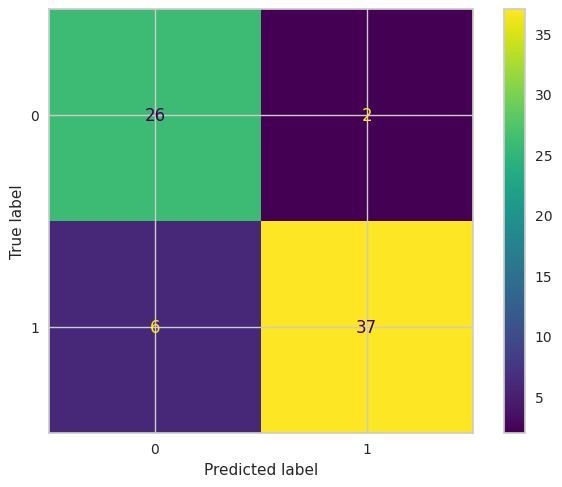

In [47]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df_clas['diagnosis'].unique()

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)  # changing test_size to be 0.1

In [49]:
Tclf= DecisionTreeClassifier() #Gini is the selection measure by The default
Tclf=Tclf.fit(x_train,y_train)
y_pred=Tclf.predict(x_test)

In [50]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8611111111111112


[[14  0]
 [ 5 17]]


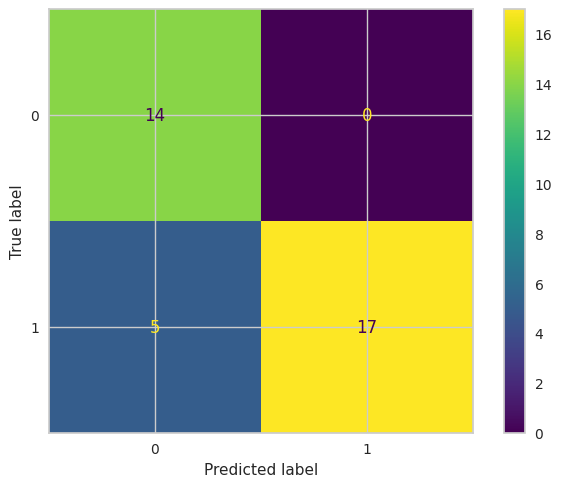

In [51]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df_clas['diagnosis'].unique()

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn)

we can observe:
* The highest accuracy is achieved when the test size is 30%, with an accuracy of approximately 0.9056* 
When the test size increases to 20%, the accuracy slightly decreases to around  0.887
* .
With a test size of 10%, the accuracy further decreases to approximately 0.861.

a larger test size means less data available for training, which might lead to decreased model performance due to the model having less data to learn from. However, it's also possible for a smaller test size to cause overfitting, where the model performs well on the test set but poorly on unseen dat

Therefore, it is important to balance training sizes and test sets to ensure that the model generalizes well to unseen data while still training on a sufficient amount of data. In this case, a test size of 30% seems to provide the best balance between training and testing, resulting in the highest accuracy.a.

 initialization a plot, converts class names to strings, and then visualizes the decision tree . The resulting plot shows the structure of the decision tree with node colors representing the class distributions.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


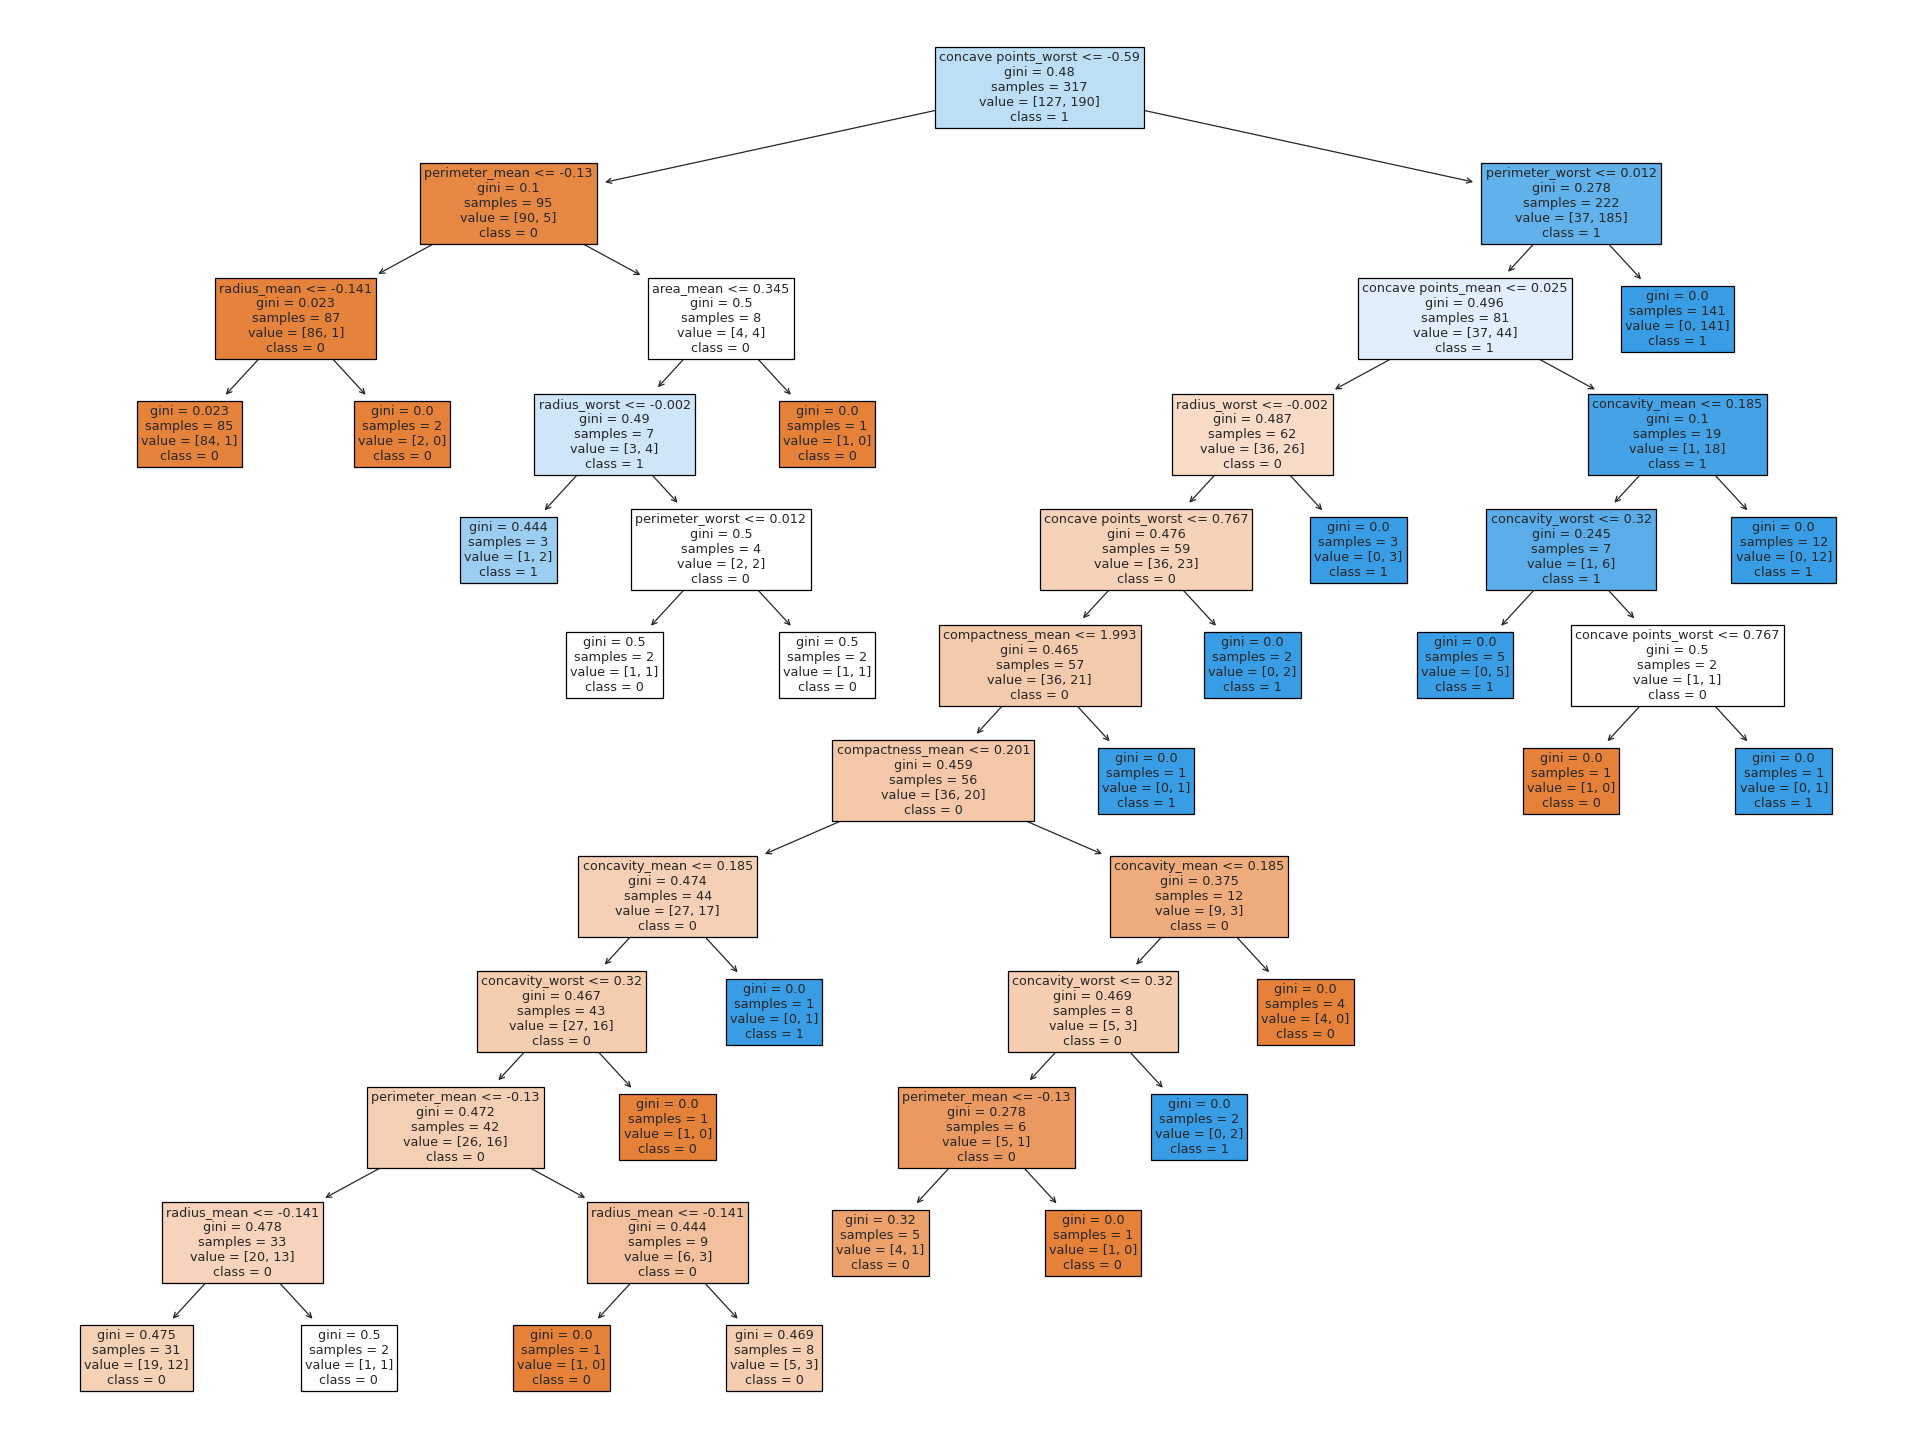

In [52]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=300)

cn = [str(diagnosis) for diagnosis in cn] #converts the class names (diagnosis) to strings
tree.plot_tree(Tclf,feature_names=fn,class_names=cn,filled=True);
#plots the decision tree stored in Tclf
#Tclf: Represents the trained decision tree classifier that you want to visualize.
#feature_names=fn: Specifies the names of the features (columns) in the dataset.
#class_names=cn: Specifies the names of the classes (target variable) in the dataset.
#filled=True: Indicates that the tree nodes should be filled with colors to represent class distributions."""

Previously we have used Gini as selection measure now will use IG (entropy) as selection measure to see the differences between them .

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [54]:
Tclf= DecisionTreeClassifier(criterion="entropy") #changing the selection measure to IG (entropy)
Tclf=Tclf.fit(x_train,y_train)
y_pred=Tclf.predict(x_test)

In [55]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9056603773584906


[[41  3]
 [ 7 55]]


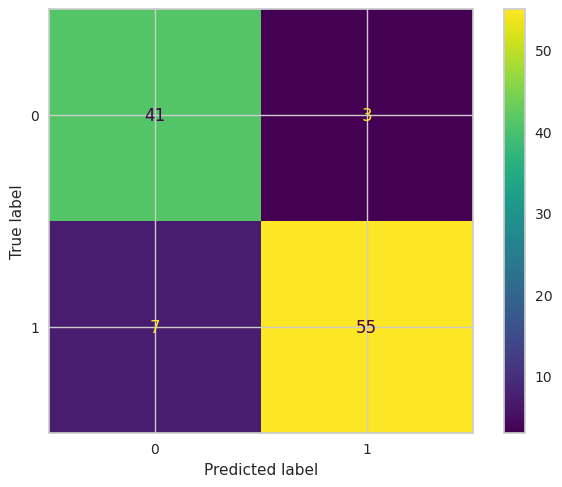

In [56]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df_clas['diagnosis'].unique()

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn)

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [58]:
Tclf= DecisionTreeClassifier(criterion="entropy") #changing the selection measure to IG (entropy)
Tclf=Tclf.fit(x_train,y_train)
y_pred=Tclf.predict(x_test)

In [59]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8873239436619719


[[26  2]
 [ 6 37]]


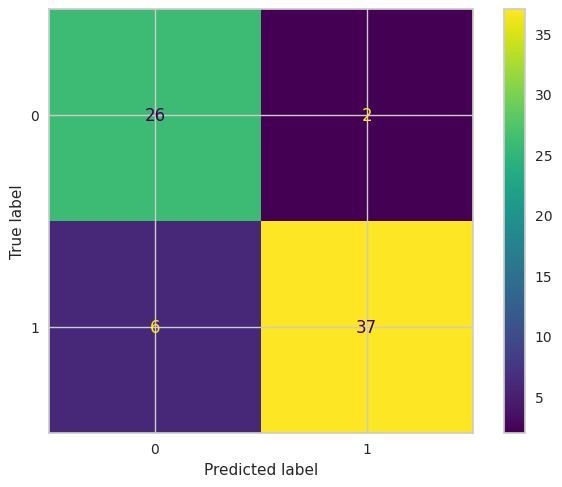

In [60]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df_clas['diagnosis'].unique()

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn)

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [62]:
Tclf= DecisionTreeClassifier(criterion="entropy") #changing the selection measure to IG (entropy)
Tclf=Tclf.fit(x_train,y_train)
y_pred=Tclf.predict(x_test)

In [63]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8611111111111112


[[14  0]
 [ 5 17]]


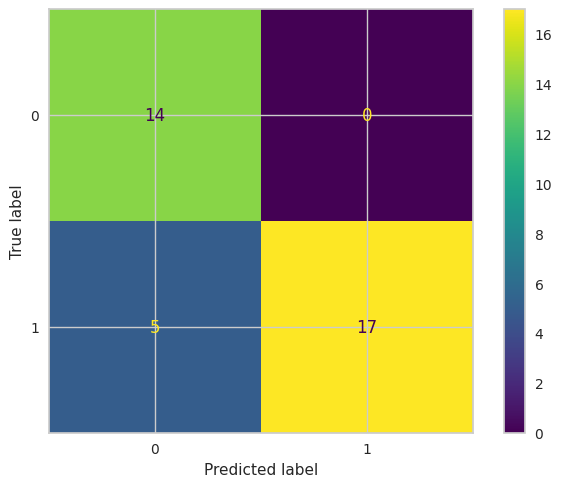

In [64]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df_clas['diagnosis'].unique()

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


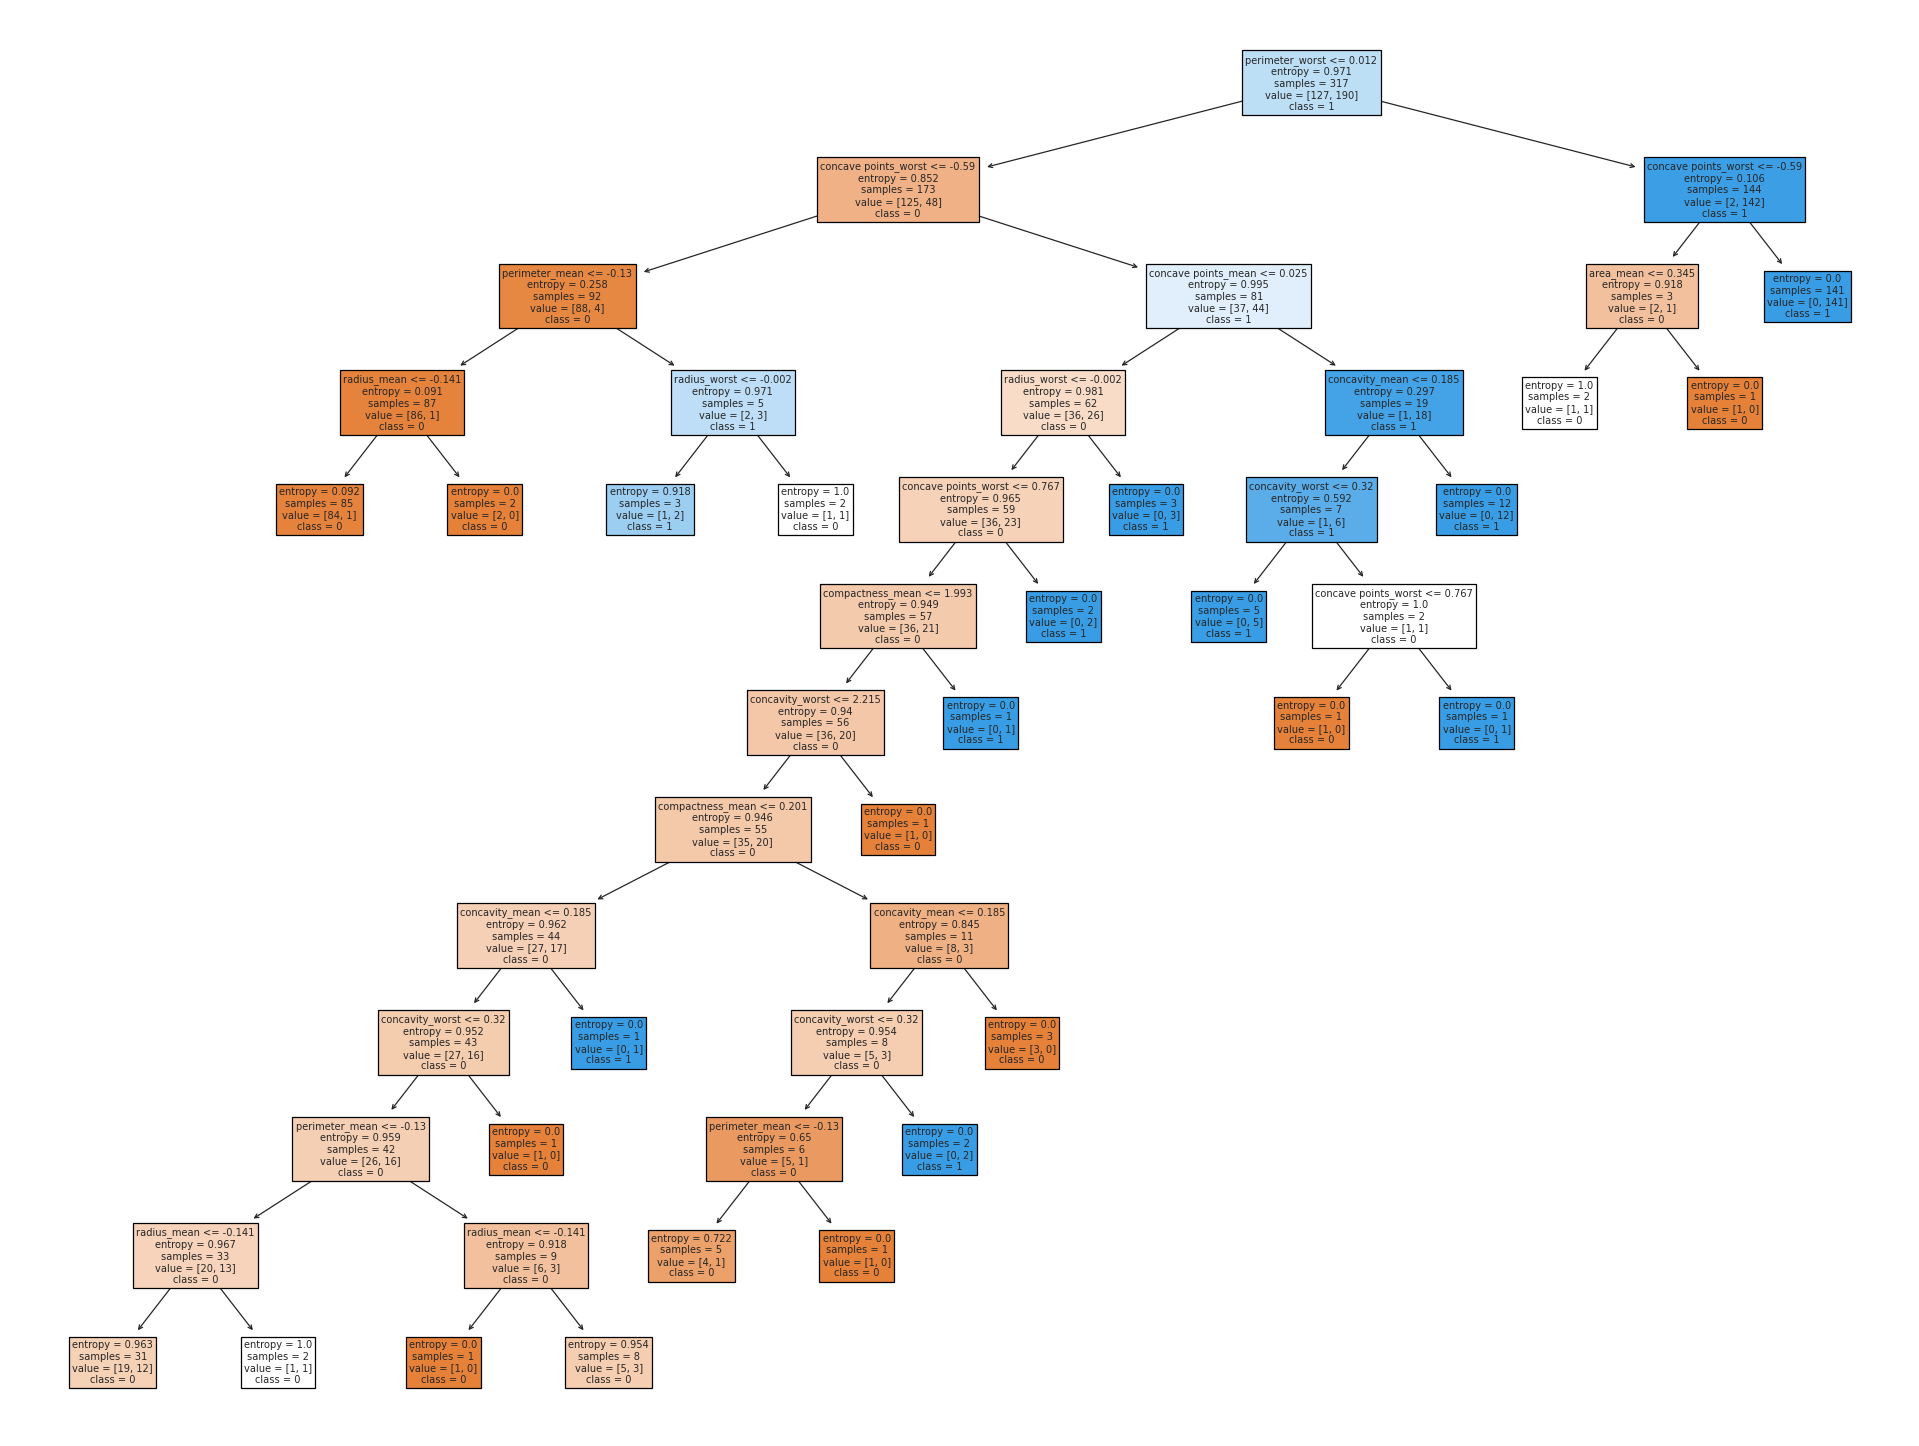

In [65]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=300)

cn = [str(diagnosis) for diagnosis in cn]
tree.plot_tree(Tclf,feature_names=fn,class_names=cn,filled=True);


### Using Gini : 

* Test Size: 30%, Accuracy: 0.9056 * 
Test Size2 50%,Accuracy: 0.88737
*
Test Size: 10%Accuracy: 0.8611886666666

### Using Information Gain(entropy ):

* Test Size: 30%, Accuracy: 0.9056 
* Test Size2 50%, Accuracy: 0.8873
* Test Size: 10%, Accuracy: 0.8611

we can see that both Gini and Information Gain (entropy) result in the same tree and accuracy scores across all test sizes.This outcome can occur when the dataset and its features do not substantially influence the choice between Gini impurity and Information Gain.

### Clustering

One of the main goals of the project is to apply clusttring to our dataset to detect the class of each row.

#### K-means clustering

Firstly we are going to remove the class labels because clustring is an unsopervised learning method which dosen't have a predifend class.

In [66]:
# Remove the class labels.
# Extract the features (excluding the target variable, if any).
import pandas as pd
df = pd.read_csv("Processed_dataset.csv")
#drop the class feature which is in coulmn1 and the id feature in coulmn2
features = df.drop(df.columns[[0, 1]], axis=1)

We start to scaling the feature to have the same unnite beacuse K-means algorithm is sensitive to feature scales.

In [67]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
# Scale the variable if needed.
# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [68]:
# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(df_scaled.head())


Scaled DataFrame:
   concave points_worst  perimeter_worst  perimeter_mean  radius_worst  \
0             -1.269231          -0.8446       -0.966879      -0.84516   
1             -1.269231          -0.8446       -0.966879      -0.84516   
2             -1.269231          -0.8446       -0.966879      -0.84516   
3             -1.269231          -0.8446       -0.966879      -0.84516   
4             -1.269231          -0.8446       -0.966879      -0.84516   

   radius_mean  concave points_mean  concavity_mean  area_mean  \
0    -0.985477            -0.791684       -0.686121   -0.62856   
1    -0.985477            -0.791684       -0.686121   -0.62856   
2    -0.985477            -0.791684       -0.686121   -0.62856   
3    -0.985477            -0.791684       -0.686121   -0.62856   
4    -0.985477            -0.791684       -0.686121   -0.62856   

   compactness_mean  concavity_worst  
0         -0.695781        -0.628342  
1         -0.695781        -0.628342  
2         -0.695781   

We apply K-means clustering using three different sizes of K which is 2 ,4 ,5.
*  K=2 beacuse it's the most common and general number of grop in the domain of cancer.
* K=4 & K=5 following the number of stages of breast cancer by the "TNM" system which has been declared as 4 in some sources and 5 in others.ead)

The result of follwing code shows the cordinates of each cluster when K=2 ,4 and 5 follwing up with the assign cluster to each data point.

In [69]:
%pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
#5) Build the K-means model
# Set a seed for random number generation
np.random.seed(8953)

# Define different values of K
k_values = [2, 4, 5]  # Example: using 2, 4, and 5 clusters

# Iterate over each value of K
for k in k_values:
    # Run K-means clustering with the current value of K
    kmeans = KMeans(n_clusters=k, random_state=8953)
    kmeans_result = kmeans.fit(df_scaled)

    # Print the clustering result for the current value of K
    print(f"Cluster Centers (K={k}):")
    print(kmeans_result.cluster_centers_)
    print("\nCluster Labels:")
    print(kmeans_result.labels_)
    print("\n")

    

   

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (K=2):
[[-0.5706124  -0.69487971 -0.64200909 -0.64878584 -0.63298001 -0.67268162
  -0.54232627 -0.60966326 -0.44339962 -0.37986798]
 [ 0.7996337   0.97377701  0.89968621  0.90918288  0.88703321  0.94266949
   0.75999464  0.85435804  0.62136274  0.532332  ]]

Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1
 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (K=4):
[[ 1.01416084  1.2063725   1.18784496  1.17238644  1.13819809  1.38737542
   1.39953971  1.49470886  1.20565132  0.8365694 ]
 [-0.72942539 -0.84460049 -0.80561824 -0.82485226 -0.7921912  -0.7621482
  -0.67562404 -0.62855966 -0.56618267 -0.53698014]
 [ 0.12617521  0.79747599  0.70620079  0.93402652  0.75013703  0.07086057
  -0.34731091  0.5067992  -0.59618232 -0.52302201]
 [ 0.91970173  0.06458826  0.09160008 -0.15718242  0.04842446  0.60914004
   0.9140889  -0.62855966  1.1701727   1.46087158]]

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 0 2 0 3 0 3 2
 1 3 3 2 2 0 1 3 3 2 3 0 3 2 3 0 3 2 3 2 0 1 3 0 3 3 1 1 1 1 1 0 1 1 0 3 0
 2 2 2 3 1 3 2 3 1 2 0 0 0 0 2 1 0 1 3 0 1 1 3 0 3 3 2 2 0 1 2 0 2 2 2 1 2
 2 3 0 2 0

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (K=5):
[[-0.82571795 -0.84460049 -0.91110962 -0.8226861  -0.89541246 -0.76989304
  -0.68612073 -0.62855966 -0.60016627 -0.5904271 ]
 [ 0.86428571  0.93562923  0.74965741  0.90605571  0.76902226  0.92750906
   0.9205544   0.78695269  0.79432103  0.57805554]
 [ 0.05074786  0.48809926  0.70620079  0.62969198  0.75013703 -0.15612475
  -0.56511723  0.18241095 -0.59618232 -0.54935212]
 [ 1.31038462  1.81127972  2.12831857  1.76743496  1.88532225  2.2317608
   2.18892258  2.09630161  1.72447076  1.45700267]
 [ 0.80723982 -0.49182702 -0.42558844 -0.79558518 -0.48879872  0.31386838
   0.85133558 -0.62855966  1.09699804  1.60197318]]

Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 4 0 4 0 2 0 0 0 0 0 0 0 0 0 0 0 4 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0
 0 0 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 3 2 1 4 1 4 2
 0 4 4 2 2 1 2 4 4 2 1 1 1 1 1 1 4 

#### Evaluation of clustering

We used two different evaluation methods and metrics (Silhouette coefficient, Elbow (total within-cluster sum of square) To evaluate and represent the result from the previos cell.

##### 1-Silhouette coefficient

The first evaluation is done using Silhouette coefficient.

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


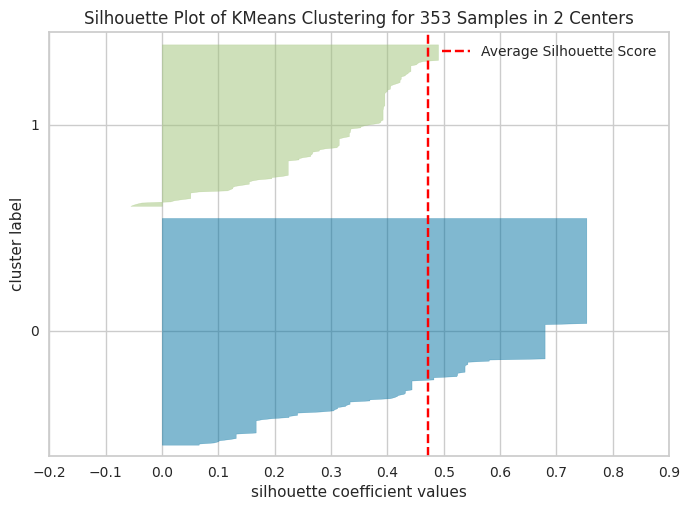

Average silhouette score for K=2: 0.471627


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


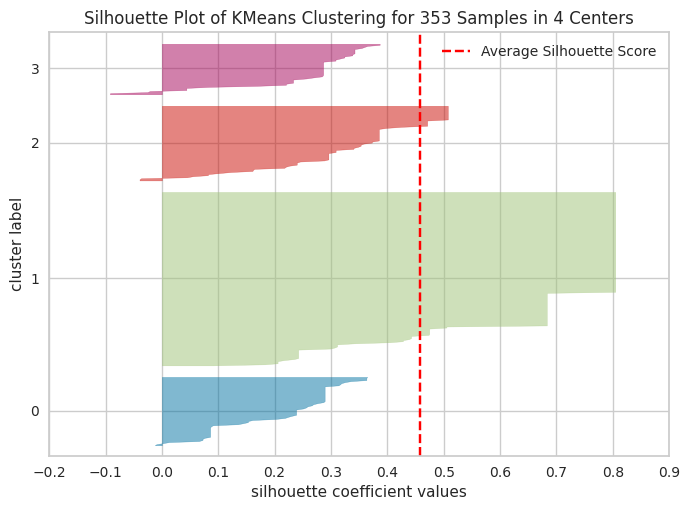

Average silhouette score for K=4: 0.457650


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


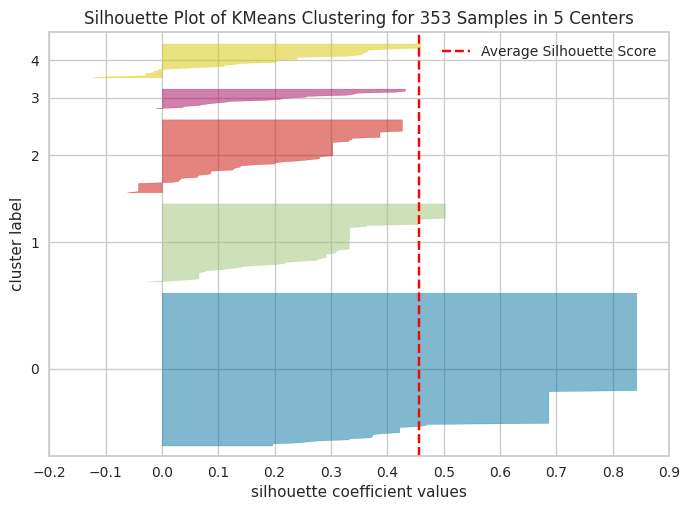

Average silhouette score for K=5: 0.457067


In [70]:
# Visual the model using (SilhouetteVisualizer)
%pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

# Define different values of K
k_values = [2, 4, 5]  # Example: using 2, 4, and 5 clusters

# Iterate over each value of K
for k in k_values:
    # Run K-means clustering with the current value of K
    kmeans = KMeans(n_clusters=k, random_state=8953)
    kmeans_result = kmeans.fit(df_scaled)

    # Visualize the clustering model with SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(df_scaled)
    visualizer.show()

    # Print the average silhouette score
    avg_silhouette_score = visualizer.silhouette_score_
    print(f"Average silhouette score for K={k}: {avg_silhouette_score:f}")

The silhouette coefficient value which is represented by doted line help us to know which number of clustring is better. The higher the silhouette coefficient value the better number of clusters K.

* When K=2 silhouette coefficient value = 0.471627.
* When K=4 silhouette coefficient value = 0.457650.
* When K=5 silhouette coefficient value = 0.457067.

Which means the best choice is K=2.

##### 2-Elbow method

The second evaluation method used is Elbow method where the best nuber of cluster is the turning point in the curve.

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=1: 3529.999999999999


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=2: 1797.911997957943


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=3: 1389.2958278584965


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=4: 1127.8332449705033


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=5: 976.9417605862078


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=6: 831.4306205988129


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=7: 771.2871386141125


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=8: 702.2381832206869


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=9: 638.132645786281


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=10: 590.883201869094


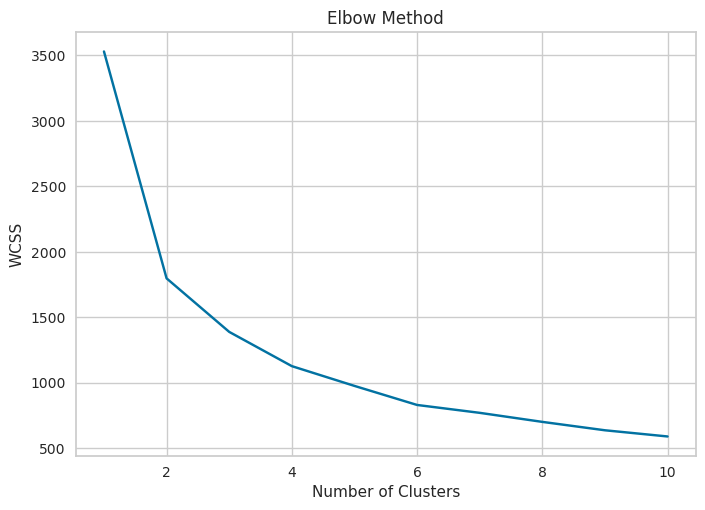

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Calculate the total within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):  # Try different values of k from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=8953)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
    # Print the WCSS value for the current value of k
    print(f"WCSS for k={i}: {kmeans.inertia_}")

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


After visually diplying the graph -which represent total within-cluster sum of square (WSS) with respect to K- we can clearly see tht the turning point is intersect with Number of cluster=2 Which means that the best number of cluster is 2 clusters.

In [25]:
%%html
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-0pky">K=2</th>
    <th class="tg-0pky">K=4</th>
    <th class="tg-0pky">K=5</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">Average Silhouette width</td>
    <td class="tg-0pky">0.471627</td>0.45
    <td class="tg-0pky">0.457650</td>
    <td class="tg-0pky">0.457067</td>
  </tr>
  <tr>
    <td class="tg-0pky">Total within-cluster sum of square</td>
    <td class="tg-0pky">1797.911997957943</td>
    <td class="tg-0pky">1127.8332449705033</td>
    <td class="tg-0pky">1170.1086600024425</td>
  </tr>
</tbody>
</table>

,K=2,K=4,K=5
Average Silhouette width,0.45,0.43,0.44
Total within-cluster sum of square,2303.260541498312,1461.7632380384705,1170.1086600024425


At the end based on majority rule we can see that the optimal number of clusters is 2. Where it has the highest average silhouette width, indicating well-separated clusters, As well as having the elbow point on 2303.26 which intersect with k=2 indicates that the optimal number of cluster is 2.

## 7.Findings

### Classification results of Decision Tree - Gini Index - 80-20 Split:

In general the resulted accuracy was high with 88.7%. This is crucial in a medical context, especially for breast cancer diagnosis, where correctly identifying benign cases (high specificity) is equally important as correctly identifying malignant cases.

From the Gini index decision tree (80-20) split, we can determine That pirimeter_worst is the most significant characteristic of the mass because it was the root of the tree, and that 0.012 is the ideal splitting point for it.

Next, in order of significance, are concave_points_worst and pirimeter_mean.

We can extract 23 rules to diagnose the mass from this tree where the decision will leads us to one of the classes either 1 or 2 (B o rM).

### Clustering results

1- Well-Separated Clusters (High Silhouette Width): 

The clustering solution with k=2 shows well-separated clusters, as indicated by a high average silhouette width. This implies distinct groupings within the data.

2- Tight Clusters (Low Within-Cluster Sum of Squares):

The low within-cluster sum of squares for k=2 suggests that instances within clusters are close to each other. This is indicative of compact, well-defined clusters.

####  the problem solutions (extracted information):

By accessing coordinates of a centroid for cluster1 with 2 clusters we come to know that all elements in cluster 2 have higher tumor measurements the the ones in cluster 1.

## 8.References

* [1] “Breast cancer,” Mayo Clinic, https://www.mayoclinic.org/diseases-conditions/breast-cancer/symptoms-causes/syc-20352470 (accessed May 2, 2024). 
* [2] “Breast cancer,” Mayo Clinic, https://www.mayoclinic.org/diseases-conditions/breast-cancer/symptoms-causes/syc-20352470 (accessed May 2, 2024). 
* [3] “Breast cancer,” Mayo Clinic, https://www.mayoclinic.org/diseases-conditions/breast-cancer/symptoms-causes/syc-20352470 (accessed May 2, 2024). 